# LAB 6 - UNSUPERVISED LEARNING

## K-Means Clustering (from Scratch)

This code implements the K-means clustering algorithm from scratch using Python and NumPy. K-means is an unsupervised learning algorithm used to partition a dataset into distinct clusters based on feature similarity. The algorithm works by randomly initializing centroids, assigning data points to the nearest centroid, and updating centroids as the mean of the assigned points. This iterative process continues until convergence or the maximum number of iterations is reached. In this implementation, we generate synthetic data with three clusters and visualize the final clustering results along with the computed centroids. This approach demonstrates the fundamental concepts of clustering and the effectiveness of K-means in identifying group structures within data.

[[ 7.88435172 -0.3011037 ]
 [ 8.73846658  0.17136828]
 [ 2.98716888  4.31424733]
 [ 5.57921282  4.76743473]]
Point 0 distances to centroids: [5.36705879 5.62239054 1.57591044 1.41141563]
Point 1 distances to centroids: [6.66307138 6.73607798 2.05389404 1.19944215]
Point 2 distances to centroids: [5.78811737 6.13574297 0.95239927 2.07157978]
Point 3 distances to centroids: [5.56810085 5.57715977 2.63136288 0.        ]
Point 4 distances to centroids: [6.51282428 6.7992622  0.58937529 2.06099196]
Point 5 distances to centroids: [5.79768852 6.19424811 0.95405418 2.38600797]
Point 6 distances to centroids: [4.3553073  4.88744537 2.55663559 2.99574228]
Point 7 distances to centroids: [6.74111647 7.24184662 1.12932761 3.56166262]
Point 8 distances to centroids: [6.72932871 7.08807958 0.         2.63136288]
Point 9 distances to centroids: [5.59571543 6.14178295 1.72972917 3.30720531]
Point 10 distances to centroids: [6.41914494 7.28365312 4.78819779 6.46943317]
Point 11 distances to centroids:

<ipython-input-13-62f8bf0af2f6>:76: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=colors[k], label=f'Cluster {k+1}')


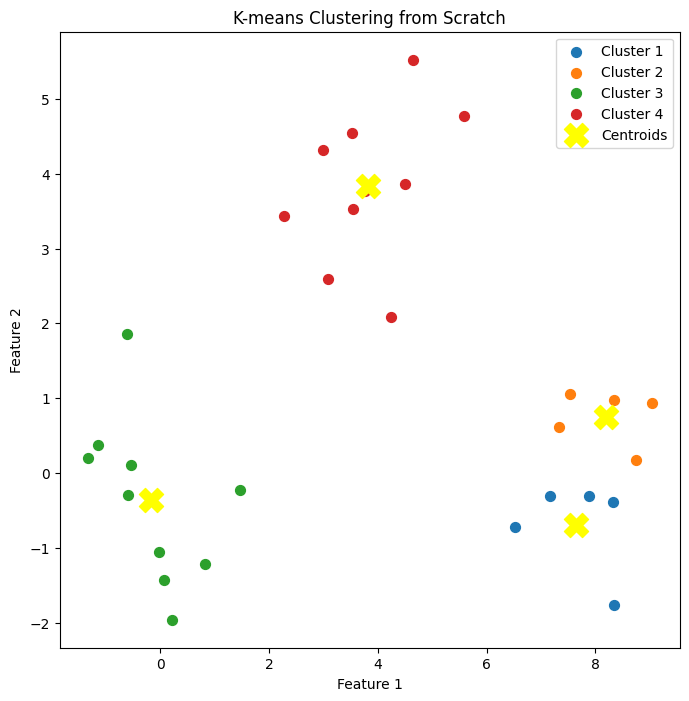

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize Centroids
def initialize_centroids(X, K):
    """Randomly initialize centroids from the dataset."""
    m = X.shape[0]
    indices = np.random.choice(m, K, replace=False)
    print(X[indices])
    return X[indices]

# Step 2: Find Closest Centroids
def find_closest_centroids(X, centroids):
    """Find the closest centroid for each data point."""
    m = X.shape[0]
    K = centroids.shape[0]  # Number of centroids
    idx = np.zeros(m, dtype=int)

    for i in range(m):
        distances = np.zeros(K)  # Initialize distances for each centroid
        for k in range(K):
            # Compute the distance from the current point to the k-th centroid
            distances[k] = np.linalg.norm(X[i] - centroids[k])
        idx[i] = np.argmin(distances)  # Find the index of the closest centroid
        print(f"Point {i} distances to centroids: {distances}")
    print(f"Cluster assignments: {idx}")

    return idx


# Step 3: Compute Centroids
def compute_centroids(X, idx, K):
    """Compute new centroids as the mean of the assigned data points."""
    n = X.shape[1]
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k]
        if len(points) > 0:
            centroids[k] = np.mean(points, axis=0)
            print(f"Centroid-{k+1}: {centroids[k]}" )
    return centroids

# Step 4: Main K-means Algorithm
def k_means(X, K, max_iters=100):
    """Main K-means clustering algorithm."""
    centroids = initialize_centroids(X, K)
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        new_centroids = compute_centroids(X, idx, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, idx

# Step 5: Generate Synthetic Data
np.random.seed(42)
X1 = np.random.randn(10, 2) + np.array([4, 4])
X2 = np.random.randn(10, 2) + np.array([0, 0])
X3 = np.random.randn(10, 2) + np.array([8, 0])
X = np.vstack((X1, X2, X3))

# Step 6: Run K-means Clustering
K = 4  # Number of clusters
centroids, idx = k_means(X, K)

# Step 7: Plot the Clusters
plt.figure(figsize=(8, 8))

# Dynamically generate K colors using a colormap
cmap = plt.get_cmap("tab10")  # You can choose any other colormap like "viridis", "plasma", etc.

colors = [cmap(i) for i in range(K)]
for k in range(K):
    cluster_points = X[idx == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=colors[k], label=f'Cluster {k+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='X', label='Centroids')
plt.title('K-means Clustering from Scratch')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Anomaly Detection (from Scratch)

Below code implements an anomaly detection system using Gaussian distribution and univariate probability estimation. The code starts by defining functions to estimate Gaussian parameters (mean and variance) and calculate the probability density for each data point. It also includes a function to find the optimal threshold ($\varepsilon$) for anomaly classification by maximizing the F1 score using cross-validation data. Synthetic data is generated with normal points centered around (5, 5) and anomalous points centered around (10, 10). The data is split into training, cross-validation, and test sets to ensure robust evaluation. The model is trained using the training set to estimate the Gaussian parameters, and the cross-validation set is used to select the best threshold that maximizes the F1 score. The final model is evaluated on the test set to compute accuracy and detect anomalies. The code also visualizes the normal and anomalous data points on a scatter plot. The use of vectorized operations ensures efficient probability computation and threshold selection, making the anomaly detection process computationally efficient and accurate.

Training set size: 132
Cross-Validation set size: 44
Test set size: 44
mu=[5.47832795 5.5618838 ] and var=[2.90910933 3.17442717]
Best epsilon: 3.1602e-03
Best F1 score on CV: 1.0
Accuracy on Test Set: 1.0000
Number of Anomalies Found: 4


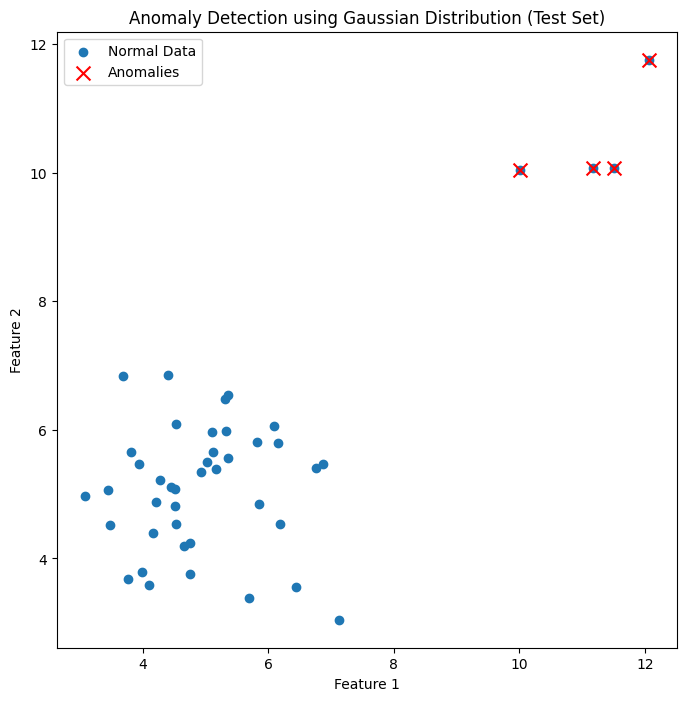

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Estimate Gaussian Distribution
def estimate_gaussian(X):
    m, n = X.shape
    mu = np.mean(X, axis=0)  # Mean of each feature
    var = np.var(X, axis=0)  # Variance of each feature
    return mu, var

# Step 2: Calculate Probabilities using Univariate Gaussians
def calculate_probabilities(X, mu, var):
    m, n = X.shape
    p = np.ones(m)  # Initialize probabilities as 1 (multiplicative identity)

    for j in range(n):
        p_j = (1 / np.sqrt(2 * np.pi * var[j])) * np.exp(-((X[:, j] - mu[j]) ** 2) / (2 * var[j]))
        p *= p_j  # Multiply the probabilities of each feature

    return p

# Step 3: Select Optimal Threshold (F1 Score)
def select_threshold(y_val, p_val):
    best_epsilon = 0
    best_F1 = 0
    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        predictions = (p_val < epsilon).astype(int)

        # Number of True Positives
        tp = np.sum((predictions == 1) & (y_val == 1))
        # Number of False Positives
        fp = np.sum((predictions == 1) & (y_val == 0))
        # Number of False Negatives
        fn = np.sum((predictions == 0) & (y_val == 1))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        # F1 score
        F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon

    return best_epsilon, best_F1

# Step 4: Generate Synthetic Data (Normal and Anomalous)
np.random.seed(42)

# Normal data points centered around (5, 5)
X_normal = 5 + np.random.randn(200, 2)
# Anomalous data points centered around (10, 10)
X_anomaly = 10 + np.random.randn(20, 2)

X = np.vstack((X_normal, X_anomaly))
y = np.hstack((np.zeros(200), np.ones(20)))  # Labels: 0 = normal, 1 = anomaly

# Step 5: Split the data into Train, CV, and Test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Cross-Validation set size: {X_cv.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Step 6: Estimate Gaussian Parameters using Training Data
mu, var = estimate_gaussian(X_train)
print(f"mu={mu} and var={var}")

# Step 7: Calculate Probabilities for CV and Test Data
p_cv = calculate_probabilities(X_cv, mu, var)
p_test = calculate_probabilities(X_test, mu, var)

# Step 8: Select the Best Threshold using CV Data
epsilon, F1 = select_threshold(y_cv, p_cv)
print(f"Best epsilon: {epsilon:.4e}")
print(f"Best F1 score on CV: {F1}")

# Step 9: Identify Anomalies in the Test Data
anomalies = X_test[p_test < epsilon]

# Step 10: Evaluation on Test Data
predictions_test = (p_test < epsilon).astype(int)
accuracy = np.mean(predictions_test == y_test)
print(f"Accuracy on Test Set: {accuracy:.4f}")
print(f"Number of Anomalies Found: {len(anomalies)}")

# Step 11: Visualization
plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], marker='x', c='red', label='Anomalies', s=100)
plt.title('Anomaly Detection using Gaussian Distribution (Test Set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## User-Based Collaborative Filtering for Movie Recommendations

This code implements a simple user-based collaborative filtering system using synthetic movie ratings data. It begins by generating 20 fictional users and 25 movie titles, assigning random ratings (from 1 to 5) to a subset of movies for each user. A user-item rating matrix is then constructed, where missing values are filled with zeros. Cosine similarity is calculated between users to find how similar their preferences are. For a selected target user (e.g., User1), the system identifies movies they haven't rated and estimates their potential ratings using a weighted average of ratings from similar users. Finally, it recommends the top-rated unseen movies to the target user based on these predictions. This example demonstrates the foundational concept of collaborative filtering without using external datasets.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import random
from IPython.display import display
from natsort import natsorted

# Set seed for reproducibility
np.random.seed(42)

# Generate 20 synthetic users and 25 movie titles
users = [f'User{i}' for i in range(1, 21)]
movies = [f'Movie{i}' for i in range(1, 26)]

# Generate random ratings data (each user rates around 10–15 movies)
data = []
for user in users:
    rated_movies = random.sample(movies, k=random.randint(10, 15))
    for movie in rated_movies:
        rating = np.random.randint(1, 6)  # Ratings from 1 to 5
        data.append((user, movie, rating))

# Create DataFrame
df = pd.DataFrame(data, columns=['User', 'Movie', 'Rating'])

# Display DataFrame
display(df)

# Display User1's ratings
# display(df[df['User'] == 'User1'])

# Create user-item matrix (Any missing ratings are filled with 0 using fillna(0))
user_movie_matrix = df.pivot_table(index='User', columns='Movie', values='Rating').fillna(0)

# Natural sort for users
sorted_users = natsorted(user_movie_matrix.index)
user_movie_matrix = user_movie_matrix.loc[sorted_users]

# Natural sort for movies
sorted_movies = natsorted(user_movie_matrix.columns)
user_movie_matrix = user_movie_matrix[sorted_movies]
user_movie_matrix.to_excel('user_movie_matrix.xlsx')

# Display user-item matrix
display(user_movie_matrix)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_movie_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# Natural sort of users
sorted_users = natsorted(user_similarity_df.index)

# Apply sorting to both rows and columns
user_similarity_df = user_similarity_df.loc[sorted_users, sorted_users]
user_similarity_df.to_excel('user_similarity.xlsx')

# Display user similarity
display(user_similarity_df)

# Choose a target user
target_user = users[0]

# Get movies the target user hasn't rated
unrated_movies = user_movie_matrix.columns[user_movie_matrix.loc[target_user] == 0]

# Predict ratings for unrated movies
predicted_ratings = {}

print("\n")
for movie in unrated_movies:
    # Get ratings from other users for this movie
    other_users = user_movie_matrix[movie] != 0
    ratings = user_movie_matrix.loc[other_users, movie]

    # Similarity scores with target user
    similarities = user_similarity_df.loc[target_user, ratings.index]
    print(f"Other users who rated {movie}:", list(ratings.index))
    print("Their ratings:", ratings.values)
    print(f"Similarities to {target_user}:", [f"{val:.3f}" for val in similarities.values])

    # Weighted average
    if similarities.sum() != 0:
        predicted_rating = np.dot(similarities, ratings) / similarities.sum()
    else:
        predicted_rating = 0

    predicted_ratings[movie] = predicted_rating
    print(f"Predicted Rating: {predicted_rating:.3f}")
    print("\n")

# Sort predictions
recommended = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)

# Show top recommendation
print(f"Top recommendation(s) for {target_user}:")
for movie, score in recommended[:5]:  # Show top 5
    print(f"{movie}: Predicted Rating = {score:.2f}")


,User,Movie,Rating
0,User1,Movie5,4
1,User1,Movie25,5
2,User1,Movie8,3
3,User1,Movie16,5
4,User1,Movie10,5
...,...,...,...
255,User20,Movie23,3
256,User20,Movie17,1
257,User20,Movie22,5
258,User20,Movie16,2


Movie,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25
User,,,,,,,,,,,,,,,,,,,,,
User1,3.0,0.0,3.0,5.0,4.0,0.0,0.0,3.0,3.0,5.0,...,5.0,3.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0
User2,0.0,4.0,5.0,0.0,0.0,3.0,4.0,4.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,5.0,0.0
User3,1.0,0.0,5.0,0.0,4.0,0.0,2.0,0.0,0.0,3.0,...,3.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,5.0,1.0
User4,1.0,2.0,4.0,0.0,2.0,4.0,2.0,0.0,0.0,2.0,...,1.0,0.0,0.0,4.0,0.0,5.0,4.0,0.0,0.0,0.0
User5,1.0,0.0,5.0,2.0,0.0,4.0,0.0,0.0,3.0,0.0,...,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0
User6,0.0,5.0,5.0,4.0,2.0,4.0,0.0,2.0,0.0,1.0,...,4.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,5.0,2.0
User7,0.0,1.0,1.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0
User8,3.0,3.0,2.0,4.0,1.0,2.0,1.0,5.0,0.0,0.0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0
User9,0.0,3.0,3.0,0.0,3.0,0.0,0.0,3.0,0.0,3.0,...,5.0,4.0,5.0,1.0,5.0,0.0,0.0,2.0,0.0,0.0


User,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11,User12,User13,User14,User15,User16,User17,User18,User19,User20
User,,,,,,,,,,,,,,,,,,,,
User1,1.000000,0.226528,0.540089,0.360240,0.557224,0.493168,0.389686,0.527263,0.542926,0.449709,0.519527,0.608612,0.431374,0.574969,0.487564,0.443241,0.329914,0.279533,0.422511,0.517435
User2,0.226528,1.000000,0.519040,0.467675,0.344952,0.637083,0.416094,0.564631,0.371366,0.492603,0.368771,0.361710,0.304237,0.281165,0.577898,0.423459,0.567886,0.469652,0.329620,0.336179
User3,0.540089,0.519040,1.000000,0.565562,0.406880,0.474836,0.525226,0.327500,0.538639,0.343471,0.497017,0.345105,0.508122,0.349939,0.570459,0.567930,0.292922,0.252825,0.427925,0.352676
User4,0.360240,0.467675,0.565562,1.000000,0.523282,0.485097,0.184651,0.258086,0.305809,0.249380,0.397677,0.353107,0.331954,0.276888,0.399654,0.326817,0.427524,0.123665,0.325979,0.495496
User5,0.557224,0.344952,0.406880,0.523282,1.000000,0.573448,0.405300,0.498296,0.367068,0.391545,0.612963,0.411070,0.445326,0.254153,0.573601,0.254984,0.445449,0.056756,0.346457,0.387431
User6,0.493168,0.637083,0.474836,0.485097,0.573448,1.000000,0.347261,0.608913,0.474838,0.412893,0.566492,0.250607,0.522128,0.395923,0.451458,0.314854,0.408922,0.421443,0.452012,0.505142
User7,0.389686,0.416094,0.525226,0.184651,0.405300,0.347261,1.000000,0.458697,0.424360,0.637037,0.431854,0.458693,0.350964,0.216232,0.411977,0.449192,0.377182,0.309844,0.302133,0.134000
User8,0.527263,0.564631,0.327500,0.258086,0.498296,0.608913,0.458697,1.000000,0.477878,0.499941,0.607329,0.393654,0.518733,0.395500,0.449765,0.482377,0.297080,0.608428,0.343089,0.515525
User9,0.542926,0.371366,0.538639,0.305809,0.367068,0.474838,0.424360,0.477878,1.000000,0.484542,0.453270,0.491362,0.585595,0.443508,0.548699,0.582684,0.261754,0.587957,0.669359,0.338742




Other users who rated Movie2: ['User2', 'User4', 'User6', 'User7', 'User8', 'User9', 'User10', 'User11', 'User13', 'User15', 'User16', 'User17', 'User18', 'User19', 'User20']
Their ratings: [4. 2. 5. 1. 3. 3. 3. 5. 3. 1. 3. 2. 2. 3. 3.]
Similarities to User1: ['0.227', '0.360', '0.493', '0.390', '0.527', '0.543', '0.450', '0.520', '0.431', '0.488', '0.443', '0.330', '0.280', '0.423', '0.517']
Predicted Rating: 2.926


Other users who rated Movie6: ['User2', 'User4', 'User5', 'User6', 'User8', 'User14', 'User15', 'User17', 'User19', 'User20']
Their ratings: [3. 4. 4. 4. 2. 1. 3. 4. 4. 4.]
Similarities to User1: ['0.227', '0.360', '0.557', '0.493', '0.527', '0.575', '0.488', '0.330', '0.423', '0.517']
Predicted Rating: 3.223


Other users who rated Movie7: ['User2', 'User3', 'User4', 'User7', 'User8', 'User11', 'User14', 'User16', 'User17', 'User19']
Their ratings: [4. 2. 2. 4. 1. 1. 1. 2. 3. 1.]
Similarities to User1: ['0.227', '0.540', '0.360', '0.390', '0.527', '0.520', '0.575', '0.

## Content-Based Recommender Using Movie Genres

This code implements a content-based movie recommendation system using the genre information of movies. It starts by creating a small dataset of movies, each associated with one or more genres. The genres are transformed into numerical vectors using **TF-IDF (Term Frequency-Inverse Document Frequency)**, which helps capture the importance of each genre term while reducing the influence of commonly occurring words. The system then computes the **cosine similarity** between these TF-IDF vectors to measure how similar each movie is to others based on genre content. Given a favorite movie, the `recommend_similar_movies` function finds and returns the top N most similar movies (excluding the input movie itself), allowing personalized recommendations based solely on genre similarity.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display

# Example movie data with genres
movies_data = {
    'MovieID': [1, 2, 3, 4, 5, 6],
    'Title': ['The Matrix', 'John Wick', 'Toy Story', 'Finding Nemo', 'The Godfather', 'Avengers'],
    'Genres': ['Action SciFi', 'Action Thriller', 'Animation Family', 'Animation Adventure Family', 'Crime Drama', 'Action SciFi']
}

# Create DataFrame
movies_df = pd.DataFrame(movies_data)

# Convert genres to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['Genres'])

# Convert TF-IDF matrix to dense format and create a DataFrame for readability
tfidf_feature_names = tfidf.get_feature_names_out()
tfidf_dense_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names, index=movies_df['Title'])

# Display the TF-IDF matrix
print("TF-IDF Matrix:")
display(tfidf_dense_df)

# Compute cosine similarity between movies based on genre TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a DataFrame from cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies_df['Title'], columns=movies_df['Title'])

# Display the similarity matrix
print("\n")
print("Cosine Similarity Matrix:")
display(cosine_sim_df)

# Mapping movie titles to indices
movie_indices = pd.Series(movies_df.index, index=movies_df['Title']).to_dict()

# Recommendation function
def recommend_similar_movies(movie_title, top_n=3):
    if movie_title not in movie_indices:
        print(f"Movie '{movie_title}' not found.")
        return []

    # Get the index of the given movie
    idx = movie_indices[movie_title]

    # Get pairwise similarity scores for this movie with all others
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity score (excluding itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Print recommendations with similarity scores
    print("\n")
    print(f"\nBecause you liked '{movie_title}', you might also like:")
    for i, score in sim_scores:
        similar_movie = movies_df['Title'].iloc[i]
        print(f"- {similar_movie}: Similarity Score = {score:.3f}")

    # Return recommended movie titles
    return [movies_df['Title'].iloc[i] for i, _ in sim_scores]

# Example usage
favorite_movie = 'John Wick'
recommendations = recommend_similar_movies(favorite_movie, top_n=3)


TF-IDF Matrix:


,action,adventure,animation,crime,drama,family,scifi,thriller
Title,,,,,,,,
The Matrix,0.645102,0.000000,0.000000,0.000000,0.000000,0.000000,0.764096,0.00000
John Wick,0.569213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.82219
Toy Story,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107,0.000000,0.00000
Finding Nemo,0.000000,0.653044,0.535506,0.000000,0.000000,0.535506,0.000000,0.00000
The Godfather,0.000000,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.00000
Avengers,0.645102,0.000000,0.000000,0.000000,0.000000,0.000000,0.764096,0.00000




Cosine Similarity Matrix:


Title,The Matrix,John Wick,Toy Story,Finding Nemo,The Godfather,Avengers
Title,,,,,,
The Matrix,1.0000,0.3672,0.00000,0.00000,0.0,1.0000
John Wick,0.3672,1.0000,0.00000,0.00000,0.0,0.3672
Toy Story,0.0000,0.0000,1.00000,0.75732,0.0,0.0000
Finding Nemo,0.0000,0.0000,0.75732,1.00000,0.0,0.0000
The Godfather,0.0000,0.0000,0.00000,0.00000,1.0,0.0000
Avengers,1.0000,0.3672,0.00000,0.00000,0.0,1.0000





Because you liked 'John Wick', you might also like:
- The Matrix: Similarity Score = 0.367
- Avengers: Similarity Score = 0.367
- Toy Story: Similarity Score = 0.000


## Dimensionality Reduction with Principal Component Analysis (PCA)

This Python code demonstrates how to apply Principal Component Analysis (PCA) to reduce the dimensionality of a synthetic dataset with five features. First, it generates random data and standardizes it using `StandardScaler` to ensure that all features contribute equally to the analysis. Then, PCA is performed to project the data onto two principal components that capture the most variance in the original dataset. The explained variance ratio is printed to show how much information is preserved by the selected components. Finally, a scatter plot visualizes the data in the new 2D space, revealing underlying patterns or clusters that may not have been visible in higher dimensions.

Original Dataset (first 5 rows):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.374540   0.950714   0.731994   0.598658   0.156019
1   0.155995   0.058084   0.866176   0.601115   0.708073
2   0.020584   0.969910   0.832443   0.212339   0.181825
3   0.183405   0.304242   0.524756   0.431945   0.291229
4   0.611853   0.139494   0.292145   0.366362   0.456070

Scaled Dataset (first 5 rows):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0  -0.439808   1.425870   0.832798   0.265310  -0.971652
1  -1.178208  -1.565503   1.290222   0.273730   0.828999
2  -1.635718   1.490198   1.175225  -1.058834  -0.887479
3  -1.085598  -0.740579   0.126331  -0.306115  -0.530632
4   0.362002  -1.292682  -0.666636  -0.530907   0.007034

PCA Components (first 5 rows):
        PC1       PC2
0  1.485848  0.105171
1  0.090878  1.465542
2  2.802347  0.297502
3  0.549662  0.022572
4 -0.846820 -0.759975

Reconstructed Data from PCA (first 5 rows):
   Feature_1  Feature_2  Feature_3  Featur

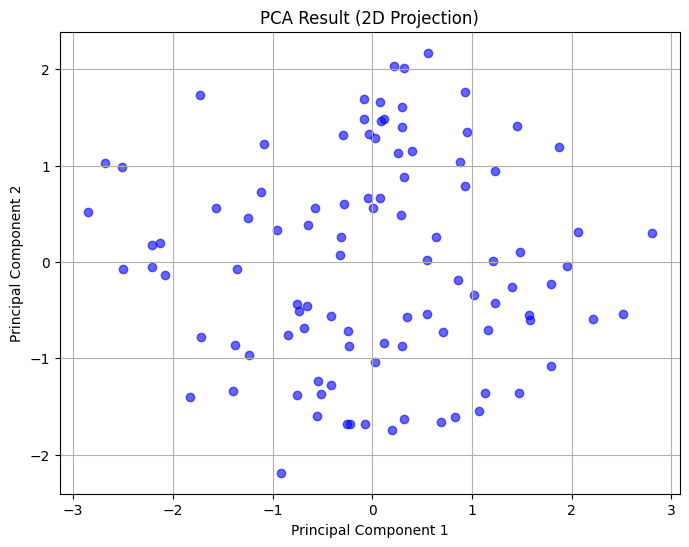

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Generate random dataset (100 samples, 5 features)
np.random.seed(42)
data = np.random.rand(100, 5)
df = pd.DataFrame(data, columns=[f'Feature_{i+1}' for i in range(5)])

# Display original dataset
print("Original Dataset (first 5 rows):")
print(df.head())

# 2. Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Display scaled dataset
print("\nScaled Dataset (first 5 rows):")
dsf = pd.DataFrame(data_scaled, columns=[f'Feature_{i+1}' for i in range(5)])
print(dsf.head())

# 3. Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# 4. Convert PCA result to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("\nPCA Components (first 5 rows):")
print(pca_df.head())

# 5. Inverse transform to reconstruct data from 2D PCA
reconstructed_data = pca.inverse_transform(principal_components)

# 6. Convert reconstructed data (still standardized) to DataFrame
reconstructed_df = pd.DataFrame(reconstructed_data, columns=df.columns)
print("\nReconstructed Data from PCA (first 5 rows):")
print(reconstructed_df.head())

# 7. Print explained variance
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

# 8. Plot PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result (2D Projection)')
plt.grid(True)
plt.show()


## Reinforcement Learning

This code implements a simple Deep Q-Learning (DQN) agent using PyTorch to solve a 1D gridworld environment, where the agent learns to move from the leftmost position to the goal on the far right. The environment penalizes each move slightly (–0.1) and gives a reward of +1 when the agent reaches the goal. The agent uses a small neural network (Q-network) to approximate the action-value function and chooses actions using an ε-greedy strategy that balances exploration and exploitation. Over multiple episodes, the agent updates its Q-values using the Bellman equation and learns the optimal policy. A simple console-based visualization shows the agent's position in each step, and a plot at the end displays the total reward per episode to illustrate learning progress. This setup is useful for understanding the core ideas of deep reinforcement learning in a minimal and visual way.


Episode 1: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 1: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 1: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 1: 🟦🟦🤖🟦🟦🟦🟦🟦
Episode 1: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 1: 🟦🟦🤖🟦🟦🟦🟦🟦
Episode 1: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 1: 🟦🟦🤖🟦🟦🟦🟦🟦
Episode 1: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 1: 🟦🟦🤖🟦🟦🟦🟦🟦
Episode 1: 🟦🟦🟦🤖🟦🟦🟦🟦
Episode 1: 🟦🟦🟦🟦🤖🟦🟦🟦
Episode 1: 🟦🟦🟦🟦🟦🤖🟦🟦
Episode 1: 🟦🟦🟦🟦🤖🟦🟦🟦
Episode 1: 🟦🟦🟦🟦🟦🤖🟦🟦
Episode 1: 🟦🟦🟦🟦🟦🟦🤖🟦
Episode 1: 🟦🟦🟦🟦🟦🤖🟦🟦
Episode 1: 🟦🟦🟦🟦🟦🟦🤖🟦
Episode 1: 🟦🟦🟦🟦🟦🟦🟦🤖
Total Reward: -0.80, Steps: 19, Epsilon: 0.95

Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🟦🟦🤖🟦🟦🟦🟦🟦
Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🟦🟦🤖🟦🟦🟦🟦🟦
Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🟦🟦🤖🟦🟦🟦🟦🟦
Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🟦🟦🤖🟦🟦🟦🟦🟦
Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🟦🤖🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦🟦🟦🟦🟦🟦🟦
Episode 2: 🤖🟦

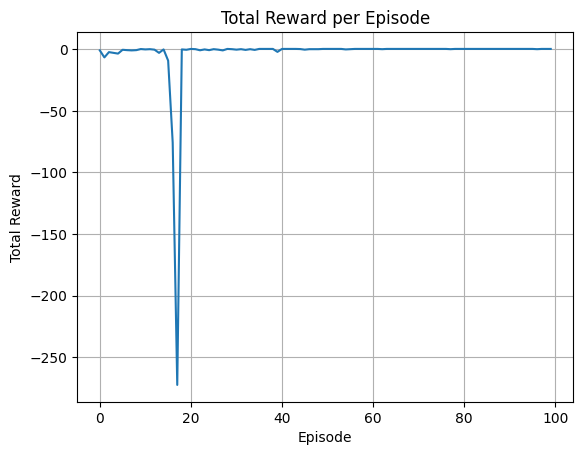

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import time
import matplotlib.pyplot as plt

# 🧱 Simple 1D Grid Environment
class SimpleGridEnv:
    def __init__(self, size=7):
        self.size = size
        self.reset()

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        if action == 1:  # move right
        # Goal is to reach the rightmost position (position size-1).
            self.state = min(self.state + 1, self.size - 1)
        elif action == 0:  # move left
            self.state = max(self.state - 1, 0)

        reward = 1 if self.state == self.size - 1 else -0.1
        done = self.state == self.size - 1
        return self.state, reward, done

# 🧠 Q-Network
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_size, 16),
            nn.ReLU(),
            nn.Linear(16, action_size)
        )

    def forward(self, x):
        return self.net(x)

# 👀 Visualization helper
def visualize(env_size, agent_pos, episode):
    line = ['🟦'] * env_size
    line[agent_pos] = '🤖'
    print(f"Episode {episode}: {''.join(line)}")

# 🧪 Training Parameters
env = SimpleGridEnv(size=8)
model = QNetwork(state_size=1, action_size=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

epsilon = 1.0
epsilon_decay = 0.95
min_epsilon = 0.01
gamma = 0.99
episodes = 100

reward_history = []

# 🏋️ Training Loop
for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0
    time.sleep(0.05)

    while not done:
        state_tensor = torch.tensor([[state]], dtype=torch.float32)
        q_values = model(state_tensor)

        # ε-greedy policy
        if random.random() < epsilon:
            action = random.choice([0, 1])
        else:
            action = torch.argmax(q_values).item()

        next_state, reward, done = env.step(action)
        next_state_tensor = torch.tensor([[next_state]], dtype=torch.float32)

        # Bellman target
        with torch.no_grad():
            target = q_values.clone()
            max_next_q = torch.max(model(next_state_tensor)).item()
            target[0, action] = reward if done else reward + gamma * max_next_q

        # Update model
        loss = loss_fn(q_values, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Visualize new position after step
        visualize(env.size, next_state, episode + 1)

        state = next_state
        total_reward += reward
        steps += 1

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    reward_history.append(total_reward)
    print(f"Total Reward: {total_reward:.2f}, Steps: {steps}, Epsilon: {epsilon:.2f}\n")

# Print the Q-table after training
print("\n📜 Learned Q-Table Approximation:")
print(f"{'State':^10} | {'Q(Left)':^10} | {'Q(Right)':^10}")
print("-" * 34)

for state in range(env.size):
    state_tensor = torch.tensor([[state]], dtype=torch.float32)
    q_values = model(state_tensor).detach().numpy().flatten()  # get numpy array
    print(f"{state:^10} | {q_values[0]:^10.3f} | {q_values[1]:^10.3f}")

# Show the best policy
print("\n🧭 Learned Policy (Best Action at Each State):")
policy = []

for state in range(env.size):
    state_tensor = torch.tensor([[state]], dtype=torch.float32)
    q_values = model(state_tensor).detach().numpy().flatten()

    best_action = np.argmax(q_values)  # 0 = left, 1 = right
    if best_action == 0:
        policy.append("←")  # Move left
    else:
        policy.append("→")  # Move right

# Display as one line
print(" ".join(policy))

# 📊 Plot Reward Progress
plt.plot(reward_history)
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid()
plt.show()
